In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sympy import *
import math
from scipy import integrate
from csv import reader
import urllib.request
from matplotlib.patches import StepPatch
from tqdm import tqdm


100%|██████████| 1000/1000 [00:00<00:00, 34175.05it/s]


-0.0002963032019493558

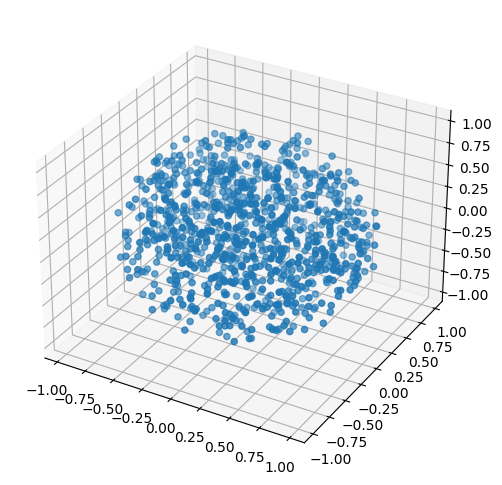

In [103]:
def CreateSphere(N,R=1):
    
    Points = np.zeros((N,3))
        
    for i in tqdm(range(N)):
        
        phi = np.random.uniform(0,2*np.pi)
        u = np.random.rand()
        r = R*u**(1/3)
        costheta = np.random.uniform(-1,1)
        theta = np.arccos(costheta)
        
        Points[i] = [r*np.cos(phi)*np.sin(theta),r*np.sin(phi)*np.sin(theta),r*np.cos(theta)]
        
    return Points

r=1
X = np.zeros(N)
Y = np.zeros_like(X)
Z = np.zeros_like(X)

for i in range(N):
    u=np.random.rand()
    r = r*np.sqrt(u)
    theta = np.random.uniform(0,2*np.pi)
    h=np.sqrt(r**2-r**2)
    z=np.random.uniform(-h,h)
        
    X[i]=r*np.cos(theta)
    Y[i] = r*np.sin(theta)
    Z[i] = z

N=1000
Sphere= CreateSphere(1000)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(Sphere[:,0],Sphere[:,1],Sphere[:,2])


x=Sphere[:,0]
y=Sphere[:,1]
z=Sphere[:,2]


xx=0
suma1=0
for i in range(N):
  suma1+=y[i]**2+z[i]**2
  Ixx=(1/N)*suma1

yy=0
suma2=0
for i in range(N):
  suma2+=x[i]**2+z[i]**2
  Iyy=(1/N)*suma1

zz=0
suma3=0
for i in range(N):
  suma3+=x[i]**2+y[i]**2
  Izz=(1/N)*suma1

def fxy(x,y,z):
    return x*y
muestraxy = np.zeros(N)

for i in range(N):
    muestraxy[i] = fxy(X[i], Y[i], Z[i])
    
Ixy = -np.average(muestraxy)
Ixy


In [ ]:
#21

[0.0, 1.0, 0.0, -0.7499999999999998, 0.0, 0.6250000000000001, 0.0, -0.5468749999999996, 0.0, 0.4921874999999994, 0.0, -0.4511718749999982, 0.0, 0.41894531249999917, 0.0, -0.3927612304687545, 0.0, 0.37094116210938327, 0.0, -0.35239410400387916]


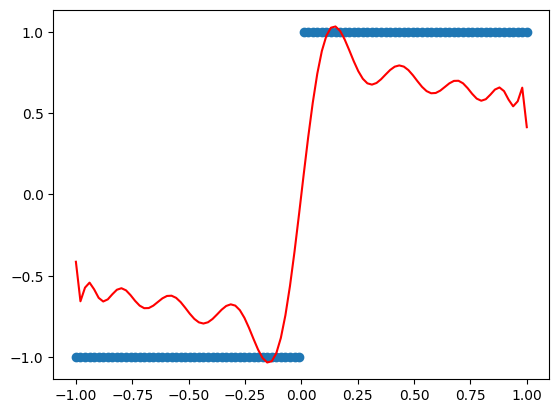

In [99]:
def sigma (x):
  if x<0:
    x=-1
  elif x==0:
    x=0
  elif x>0:
    x=1
  return x

X= np.linspace(-1,1,100)
y=[]
for i in X:
 y.append(sigma(i))

n=15
N=20
plt.scatter(X,y)
Raices, Pesos = np.polynomial.legendre.leggauss(15)

def Getlegendre_Polynomials(n):  
    x = symbols('x')
    y = symbols('y')
    y = (x**2 - 1)**n
    pol = diff(y,x,n)/(2**n * math.factorial(n)) 
    pol= sym.lambdify(x,pol)
    return pol

polys=[]
for i in range(N):
  polys.append(Getlegendre_Polynomials(i))

def multiplicacion (x,i):  
  return sigma(x)*polys[i](x)


def Getcoeficients():
  coeficientes= []
  for i in range(N):
     c = int((2*i+1)/2)
     integral = integrate.quad(multiplicacion,-1,1,args=(i))
     integral = integral[0]
     coeficientes.append(c*integral)
  return coeficientes

coeficientes = Getcoeficients()
print(coeficientes)

def valor (x):
  suma= 0
  for i in range(N):
    cn= coeficientes[i]
    Pn= polys[i](x)
    multi = cn*Pn
    suma+= multi
  return suma

Y=[]
for i in X:
  Y.append(valor(i))

plt.plot(X,Y,color='r')